In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
import seaborn as sns

Data Ingestion


In [ ]:
df=pd.read_csv('/content/gcar_data.csv')
df.head()

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,75721,ford,Ford Kuga,black,05/2023,2023,38490,140,190,Automatic,Hybrid,"5,4 l/100 km",124 g/km,100.0,ST-Line Hybrid Adapt.LED+Head-Up-Display Klima
1,80184,hyundai,Hyundai i10,black,09/2018,2018,11555,49,67,Manual,Petrol,"4,6 l/100 km",106 g/km,27782.0,"blue Trend,Viele Extras,Top-Zustand"
2,19864,audi,Audi Q4 e-tron,grey,05/2021,2021,48886,125,170,Automatic,Electric,NaN,0 g/km,4247.0,35 e-tron S line/Matrix/Pano/ACC/SONOS/LM 21
3,76699,honda,Honda CR-V,red,07/2018,2018,24490,114,155,Automatic,Petrol,"7,5 l/100 km",175 g/km,57000.0,2.0 Lifestyle Plus Automatik Navi FAP
4,92991,kia,Kia Sportage,black,02/2023,2023,34990,110,150,Manual,Petrol,"5,9 l/100 km",150 g/km,7500.0,"1.6 T 48V 2WD Spirit LED, WR"


In [ ]:
df.shape

(100000, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                100000 non-null  int64  
 1   brand                     100000 non-null  object 
 2   model                     100000 non-null  object 
 3   color                     99924 non-null   object 
 4   registration_date         99999 non-null   object 
 5   year                      100000 non-null  object 
 6   price_in_euro             100000 non-null  object 
 7   power_kw                  99925 non-null   object 
 8   power_ps                  99928 non-null   object 
 9   transmission_type         100000 non-null  object 
 10  fuel_type                 100000 non-null  object 
 11  fuel_consumption_l_100km  88761 non-null   object 
 12  fuel_consumption_g_km     100000 non-null  object 
 13  mileage_in_km             99932 non-null   fl

In [ ]:
df.describe()

,Unnamed: 0,mileage_in_km
count,100000.000000,9.993200e+04
mean,49999.500000,8.559891e+04
std,28867.657797,7.929713e+04
min,0.000000,0.000000e+00
25%,24999.750000,2.550000e+04
50%,49999.500000,6.800000e+04
75%,74999.250000,1.270000e+05
max,99999.000000,3.800000e+06


In [ ]:
df.dtypes

,0
Unnamed: 0,int64
brand,object
model,object
color,object
registration_date,object
year,object
price_in_euro,object
power_kw,object
power_ps,object
transmission_type,object


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
brand,0
model,0
color,76
registration_date,1
year,0
price_in_euro,0
power_kw,75
power_ps,72
transmission_type,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df=df.drop(['Unnamed: 0','offer_description','registration_date'],axis=1)

In [ ]:
df.head()

,brand,model,color,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
0,ford,Ford Kuga,black,2023,38490,140,190,Automatic,Hybrid,"5,4 l/100 km",124 g/km,100.0
1,hyundai,Hyundai i10,black,2018,11555,49,67,Manual,Petrol,"4,6 l/100 km",106 g/km,27782.0
2,audi,Audi Q4 e-tron,grey,2021,48886,125,170,Automatic,Electric,NaN,0 g/km,4247.0
3,honda,Honda CR-V,red,2018,24490,114,155,Automatic,Petrol,"7,5 l/100 km",175 g/km,57000.0
4,kia,Kia Sportage,black,2023,34990,110,150,Manual,Petrol,"5,9 l/100 km",150 g/km,7500.0


Price

In [ ]:
df['price_in_euro'].sort_values().head(10)

,price_in_euro
55480,Navigation
31973,258 PS TÜV 07/24
36100,4-J.GARANTIE
69748,4x4 mit hoher Anhängelast*
10647,62.000km
91273,8 x Räder
99461,8xREIFEN
77641,AAC/ NAV/ LEDER/ SHZ/ GRA
10726,AC-Schnitzer 360 PS
58124,AzV und Fahrradträger


In [ ]:
df[df['price_in_euro'].astype(str).str[0].str.isalpha()].head()

,brand,model,color,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
4733,mazda,Mazda CX-5,grey,Manual,AHK,2016,122 g/km,Manual,160.629 km,Diesel,06/2016,NaN
22964,audi,Audi A4,silver,Automatic,Automatik,2005,194 g/km,Automatic,74.194 km,Petrol,11/2005,NaN
25136,ford,Ford Focus,black,113.000 km,Winter,Petrol,2017,Manual,12890,03/2017,Manual,NaN
27083,bmw,BMW 320,black,Manual,ROSTFREI,2005,158 g/km,Manual,264.000 km,Diesel,05/2005,3.0
27317,bmw,BMW 320,blue,Manual,LEDER,2005,158 g/km,Manual,300.000 km,Diesel,05/2005,NaN


In [ ]:
df['price_in_euro'].astype(str).str[0].str.isalpha().sum()

np.int64(18)

In [ ]:
df=df[~df['price_in_euro'].astype(str).str[0].str.isalpha()] #non alphabet

In [ ]:
df.shape

(99982, 12)

In [ ]:
df['price_in_euro']=df['price_in_euro'].str.replace(r'[^0-9.]','',regex=True)
df['price_in_euro']=df['price_in_euro'].str.strip()
df['price_in_euro']=df['price_in_euro'].replace('',np.nan)

In [ ]:
df['price_in_euro']=df['price_in_euro'].replace('..',np.nan)

In [ ]:
df['price_in_euro'].isnull().sum()

np.int64(1)

In [ ]:
df=df[~df['price_in_euro'].isnull()]

In [ ]:
df['price_in_euro'].isnull().sum()#

np.int64(0)

In [ ]:
df['price_in_euro']=df['price_in_euro'].astype(float)

In [ ]:
df.shape

(99958, 12)

brand

In [ ]:
df['brand']=df['brand'].str.strip()
df['brand'].unique()

array(['ford', 'hyundai', 'audi', 'honda', 'kia', 'dacia', 'bmw',
       'citroen', 'alfa-romeo', 'land-rover', 'jaguar', 'dodge', 'fiat',
       'lamborghini', 'mazda', 'isuzu', 'jeep', 'ferrari', 'bentley',
       'maserati', 'daihatsu', 'chevrolet', 'aston-martin', 'cadillac',
       'daewoo', 'chrysler', 'lancia', 'lada', 'infiniti'], dtype=object)

Color

In [ ]:
df['color'].value_counts().head()

,count
color,
black,24116
grey,19686
white,17255
blue,12673
silver,11717


In [ ]:
df[df['color'].isnull()]['brand'].value_counts()

,count
brand,
audi,12
hyundai,8
ford,8
kia,6
dacia,6
fiat,6
citroen,4
land-rover,4
dodge,4


In [ ]:
df[df['brand']=='audi']['color'].value_counts().head()

,count
color,
black,5036
grey,4051
silver,3240
blue,2872
white,2846


In [ ]:
df['color'].mode()[0]  #only 72 data so no issue which mostly black is suitable and  also high for audi

'black'

In [ ]:
df['color']=df['color'].fillna(df['color'].mode()[0])

In [ ]:
df['color'].isnull().sum()

np.int64(0)

In [ ]:
df.shape

(99958, 12)

Year

In [ ]:
df['year'].head()

,year
0,2023
1,2018
2,2021
3,2018
4,2023


In [ ]:
df['year']=pd.to_numeric(df['year'],errors='coerce')


In [ ]:
df[df['year'].isnull()]

,brand,model,color,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
10647,citroen,Citroen C2,grey,NaN,62.0,"5,9 l/100 km",54,Automatic,04/2008,- (g/km),2008,3000.0
10726,bmw,BMW X3,grey,NaN,360.0,"8,3 l/100 km",265,Automatic,01/2016,193 g/km,2016,33490.0
31973,bmw,BMW 330,black,NaN,2580724.0,"4,9 l/100 km",190,Automatic,04/2013,- (g/km),2013,15699.0
36100,ford,Ford Kuga,silver,NaN,4.0,"1,4 l/100 km",165,Automatic,11/2021,31 g/km,2021,33950.0
40162,audi,Audi A1,blue,NaN,6.0,2011,126 g/km,Manual,110.250 km,Petrol,04/2011,NaN
40836,audi,Audi Q8,white,NaN,103.0,NaN,250,Automatic,06/2023,415 km Reichweite,2023,85990.0
55192,fiat,Fiat Scudo,white,NaN,5.0,"6,8 l/100 km",94,Manual,12/2012,180 g/km,2012,8550.0
63469,daihatsu,Daihatsu Sirion,black,NaN,5.5,"5,6 l/100 km",64,Manual,07/2007,137 g/km,2007,3800.0
69748,kia,Kia Sportage,black,NaN,44.0,"6,8 l/100 km",99,Manual,05/2015,161 g/km,2015,14488.0
85627,audi,Audi A1,white,NaN,5.0,"5,4 l/100 km",90,Manual,06/2014,128 g/km,2014,12250.0


In [ ]:
df['year'].isnull().sum()

np.int64(12)

In [ ]:
df.dropna(subset='year',inplace=True)

In [ ]:
df['year'].isnull().sum()

np.int64(0)

In [ ]:
df['year']=df['year'].astype(int)

In [ ]:
df.shape

(99946, 12)

Power_KW

In [ ]:
df['power_kw'].dtype

dtype('O')

In [ ]:
df['power_kw'].unique()

array(['140', '49', '125', '114', '110', '103', '130', '88', '60', '67',
       '120', '290', '150', '77', '142', '74', '92', '245', '190', '118',
       '105', '85', '221', '195', '169', '147', '66', '104', '390', '70',
       '64', '295', '258', '272', '100', '471', '127', '154', '177',
       '280', '185', '99', '132', '135', '121', '287', '155', '51', '95',
       '260', '441', '220', '530', '141', '200', '566', '386', '73',
       '136', '375', '111', '268', nan, '145', '55', '240', '84', '210',
       '63', '225', '107', '206', '129', '294', '235', '405', '257',
       '377', '184', '80', '52', '160', '33', '87', '202', '81', '180',
       '133', '230', '331', '44', '213', '62', '59', '61', '96', '97',
       '122', '310', '275', '108', '283', '338', '162', '156', '300',
       '360', '188', '445', '170', '255', '115', '50', '46', '134', '243',
       '165', '227', '250', '90', '515', '344', '317', '183', '309',
       '171', '485', '423', '382', '381', '316', '176', '449', '460'

<Axes: ylabel='power_kw'>

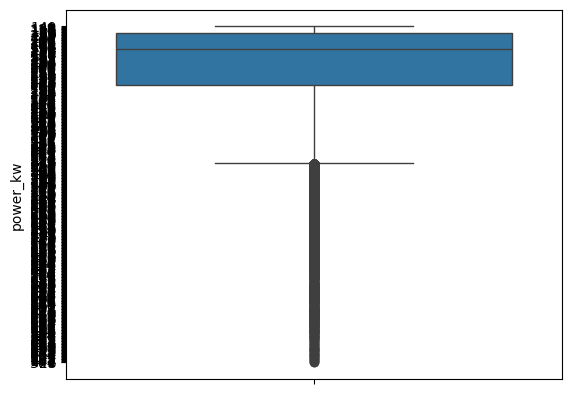

In [ ]:
sns.boxplot(df['power_kw'])

In [ ]:
df['power_kw']=df['power_kw'].str.replace(r'[^0-9]','',regex=True)#this and correce same
df['power_kw']=df['power_kw'].str.strip()


In [ ]:
df['power_kw'].isnull().sum()

np.int64(72)

In [ ]:
df[df['power_kw'].isnull()]

,brand,model,color,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
124,isuzu,Isuzu D-Max,white,2017,24890.0,NaN,NaN,Manual,Diesel,NaN,- (g/km),58500.0
496,ferrari,Ferrari,blue,2022,499990.0,NaN,NaN,Automatic,Hybrid,NaN,- (g/km),1590.0
882,fiat,Fiat 500,blue,2022,22990.0,NaN,NaN,Automatic,Electric,NaN,0 g/km,11892.0
1080,hyundai,Hyundai SANTA FE,brown,2021,51990.0,NaN,NaN,Manual,Hybrid,NaN,- (g/km),25835.0
1361,dodge,Dodge RAM,grey,2019,29499.0,NaN,NaN,Automatic,Petrol,NaN,- (g/km),66000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
94382,bmw,BMW 114,black,2013,8950.0,NaN,NaN,Manual,Diesel,"4,3 l/100 km",114 g/km,175000.0
94451,audi,Audi TT,silver,2001,13900.0,NaN,NaN,Manual,Other,NaN,- (g/km),154920.0
95843,ford,Ford Fiesta,red,2018,16280.0,NaN,NaN,Manual,Petrol,"4,8 l/100 km",108 g/km,27000.0
96428,bmw,BMW 420,blue,2023,63490.0,NaN,NaN,Automatic,Diesel,5 l/100 km,130 g/km,1000.0


In [ ]:
df['power_kw']=df['power_kw'].astype(float)

In [ ]:
df['power_kw'].median()

117.0

In [ ]:
df['power_kw']=df['power_kw'].fillna(df['power_kw'].median())

In [ ]:
df['power_kw'].isnull().sum()

np.int64(0)

In [ ]:
df.shape

(99946, 12)

Power_ps

In [ ]:
df['power_ps'].head()

,power_ps
0,190
1,67
2,170
3,155
4,150


In [ ]:
df['power_ps']=df['power_ps'].str.strip()
df['power_ps'].dtype

dtype('O')

In [ ]:
df['power_ps']=df['power_ps'].astype(float)

In [ ]:
df['power_ps'] = pd.to_numeric(df['power_ps'], errors='coerce')
df[df['power_ps'].isnull()]

,brand,model,color,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
124,isuzu,Isuzu D-Max,white,2017,24890.0,117.0,NaN,Manual,Diesel,NaN,- (g/km),58500.0
496,ferrari,Ferrari,blue,2022,499990.0,117.0,NaN,Automatic,Hybrid,NaN,- (g/km),1590.0
882,fiat,Fiat 500,blue,2022,22990.0,117.0,NaN,Automatic,Electric,NaN,0 g/km,11892.0
1080,hyundai,Hyundai SANTA FE,brown,2021,51990.0,117.0,NaN,Manual,Hybrid,NaN,- (g/km),25835.0
1361,dodge,Dodge RAM,grey,2019,29499.0,117.0,NaN,Automatic,Petrol,NaN,- (g/km),66000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
94382,bmw,BMW 114,black,2013,8950.0,117.0,NaN,Manual,Diesel,"4,3 l/100 km",114 g/km,175000.0
94451,audi,Audi TT,silver,2001,13900.0,117.0,NaN,Manual,Other,NaN,- (g/km),154920.0
95843,ford,Ford Fiesta,red,2018,16280.0,117.0,NaN,Manual,Petrol,"4,8 l/100 km",108 g/km,27000.0
96428,bmw,BMW 420,blue,2023,63490.0,117.0,NaN,Automatic,Diesel,5 l/100 km,130 g/km,1000.0


In [ ]:
df['power_ps'].isnull().sum()

np.int64(72)

In [ ]:
df['power_ps'].fillna(df['power_ps'].median(), inplace=True)

/tmp/ipython-input-207289921.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['power_ps'].fillna(df['power_ps'].median(), inplace=True)


In [ ]:
df['power_ps'].isnull().sum()

np.int64(0)

In [ ]:
df.shape

(99946, 12)

Fuel Consumption L/100

In [ ]:
df['fuel_consumption_l_100km'].unique()

array(['5,4 l/100 km', '4,6 l/100 km', nan, '7,5 l/100 km',
       '5,9 l/100 km', '6,7 l/100 km', '8,9 l/100 km', '5,6 l/100 km',
       '5 l/100 km', '7,4 l/100 km', '8,2 l/100 km', '9,4 l/100 km',
       '3,8 l/100 km', '5,3 l/100 km', '6,9 l/100 km', '7,2 l/100 km',
       '8,4 l/100 km', '4,7 l/100 km', '6,1 l/100 km', '6,3 l/100 km',
       '4,9 l/100 km', '4,8 l/100 km', '4,5 l/100 km', '6,2 l/100 km',
       '6,6 l/100 km', '9,3 l/100 km', '4,1 l/100 km', '8,3 l/100 km',
       '4,4 l/100 km', '9,9 l/100 km', '4,3 l/100 km', '6,4 l/100 km',
       '7,6 l/100 km', '7,9 l/100 km', '5,8 l/100 km', '2 l/100 km',
       '12,3 l/100 km', '5,5 l/100 km', '5,2 l/100 km', '6 l/100 km',
       '6,8 l/100 km', '5,1 l/100 km', '7,8 l/100 km', '0 kWh/100 km',
       '3,9 l/100 km', '12,1 l/100 km', '17,9 l/100 km', '12,7 l/100 km',
       '10,2 l/100 km', '1,8 l/100 km', '3,5 l/100 km', '8,1 l/100 km',
       '11,7 l/100 km', '11 l/100 km', '16,9 l/100 km', '7,7 l/100 km',
       '6,5 l/100

In [ ]:
df['fuel_consumption_l_100km']=df['fuel_consumption_l_100km'].astype(str)

In [ ]:
df['fuel_consumption_l_100km']=df['fuel_consumption_l_100km'].str.replace(r'[^0-9,/]','',regex=True)
df['fuel_consumption_l_100km']

,fuel_consumption_l_100km
0,"5,4/100"
1,"4,6/100"
2,
3,"7,5/100"
4,"5,9/100"
...,...
99995,"5,3/100"
99996,"5,2/100"
99997,"6,3/100"
99998,"5,5/100"


In [ ]:
df['fuel_consumption_l_100km']=df['fuel_consumption_l_100km'].str.replace('/100','')
df['fuel_consumption_l_100km']=df['fuel_consumption_l_100km'].str.replace(',','.')
df['fuel_consumption_l_100km']

,fuel_consumption_l_100km
0,5.4
1,4.6
2,
3,7.5
4,5.9
...,...
99995,5.3
99996,5.2
99997,6.3
99998,5.5


In [ ]:
df['fuel_consumption_l_100km'].isnull().sum() #why here 0 ean nan is replced by '' beacuse nan also letter

np.int64(0)

In [ ]:
df['fuel_consumption_l_100km']=df['fuel_consumption_l_100km'].replace('',np.nan)

In [ ]:
df['fuel_consumption_l_100km'].isnull().sum()

np.int64(11652)

In [ ]:
df['fuel_consumption_l_100km'].dtype

dtype('O')

In [ ]:
df['fuel_consumption_l_100km']=df['fuel_consumption_l_100km'].astype(float)
df['fuel_consumption_l_100km'].head()

,fuel_consumption_l_100km
0,5.4
1,4.6
2,NaN
3,7.5
4,5.9


In [ ]:
# Divide 25–100 by 10
df.loc[(df['fuel_consumption_l_100km'] > 25) & (df['fuel_consumption_l_100km'] < 100), 'fuel_consumption_l_100km'] /= 10

# Divide 100+ by 100
df.loc[df['fuel_consumption_l_100km'] >= 100, 'fuel_consumption_l_100km'] /= 100

In [ ]:
df['fuel_consumption_l_100km'].unique()

array([ 5.4 ,  4.6 ,   nan,  7.5 ,  5.9 ,  6.7 ,  8.9 ,  5.6 ,  5.  ,
        7.4 ,  8.2 ,  9.4 ,  3.8 ,  5.3 ,  6.9 ,  7.2 ,  8.4 ,  4.7 ,
        6.1 ,  6.3 ,  4.9 ,  4.8 ,  4.5 ,  6.2 ,  6.6 ,  9.3 ,  4.1 ,
        8.3 ,  4.4 ,  9.9 ,  4.3 ,  6.4 ,  7.6 ,  7.9 ,  5.8 ,  2.  ,
       12.3 ,  5.5 ,  5.2 ,  6.  ,  6.8 ,  5.1 ,  7.8 ,  0.  ,  3.9 ,
       12.1 , 17.9 , 12.7 , 10.2 ,  1.8 ,  3.5 ,  8.1 , 11.7 , 11.  ,
       16.9 ,  7.7 ,  6.5 ,  5.7 ,  7.1 ,  7.  ,  4.  ,  1.4 ,  4.2 ,
        8.7 ,  9.5 , 10.1 ,  7.3 ,  8.  , 12.  ,  9.6 ,  8.5 , 15.8 ,
       12.8 ,  9.  ,  8.8 ,  9.7 , 14.7 ,  1.3 , 10.7 , 17.2 , 14.6 ,
       11.5 ,  9.8 , 13.6 , 10.5 , 13.8 , 11.1 , 10.3 ,  1.9 ,  1.1 ,
       14.3 , 13.4 ,  3.6 , 19.  , 12.5 , 12.2 , 21.3 , 14.1 ,  2.1 ,
       10.4 ,  1.7 , 13.3 , 14.4 ,  3.2 , 14.  ,  2.3 ,  1.2 , 10.  ,
       11.8 ,  2.2 , 12.6 ,  1.6 ,  1.5 , 11.2 , 17.1 ,  8.6 , 11.9 ,
       11.4 , 15.3 ,  9.2 ,  3.95, 17.  , 18.  , 19.5 , 21.5 , 13.7 ,
       14.2 ,  0.6 ,

<Axes: ylabel='fuel_consumption_l_100km'>

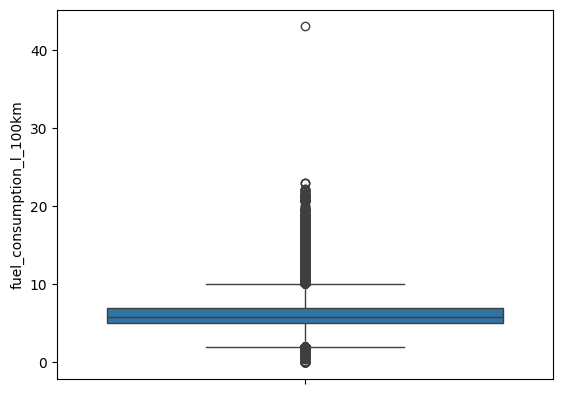

In [ ]:
sns.boxplot(df['fuel_consumption_l_100km'])

In [ ]:
df['fuel_consumption_l_100km']=df['fuel_consumption_l_100km'].fillna(df['fuel_consumption_l_100km'].median())

In [ ]:
df['fuel_consumption_l_100km'].isnull().sum()

np.int64(0)

In [ ]:
df.shape

(99946, 12)

Fuel Consumption g/km

In [ ]:
df['fuel_consumption_g_km'].sample(10)

,fuel_consumption_g_km
57191,110 g/km
92334,143 g/km
78228,136 g/km
98560,134 g/km
77737,- (g/km)
65375,235 g/km
39601,119 g/km
99829,130 g/km
95928,135 g/km
35668,161 g/km


In [ ]:
df['fuel_consumption_g_km']=df['fuel_consumption_g_km'].astype(str)
df['fuel_consumption_g_km'].str.contains('-(g/km)').sum()


/tmp/ipython-input-1826382789.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['fuel_consumption_g_km'].str.contains('-(g/km)').sum()


np.int64(0)

In [ ]:
df['fuel_consumption_g_km']=df['fuel_consumption_g_km'].str.replace(r'[^0-9]','',regex=True)
df['fuel_consumption_g_km']=df['fuel_consumption_g_km'].replace('',np.nan)

<Axes: ylabel='fuel_consumption_g_km'>

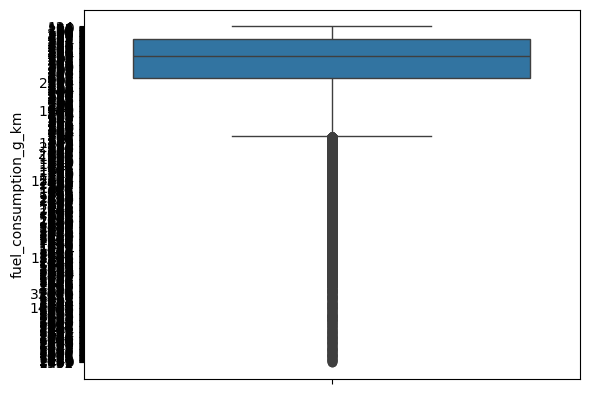

In [ ]:
sns.boxplot(df['fuel_consumption_g_km'])

In [ ]:
df['fuel_consumption_g_km']=df['fuel_consumption_g_km'].astype(float)
df['fuel_consumption_g_km'].fillna(df['fuel_consumption_g_km'].median(),inplace=True)

/tmp/ipython-input-1874235505.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fuel_consumption_g_km'].fillna(df['fuel_consumption_g_km'].median(),inplace=True)


In [ ]:
df[df['fuel_consumption_g_km']=='- (g/km)']##3

,brand,model,color,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km


In [ ]:
df['fuel_consumption_g_km'].isnull().sum()

np.int64(0)

Mileage


In [ ]:
df['mileage_in_km']

,mileage_in_km
1,27782.0
3,57000.0
4,7500.0
5,160000.0
7,64300.0
...,...
99995,148000.0
99996,31698.0
99997,77900.0
99998,52251.0


<Axes: ylabel='mileage_in_km'>

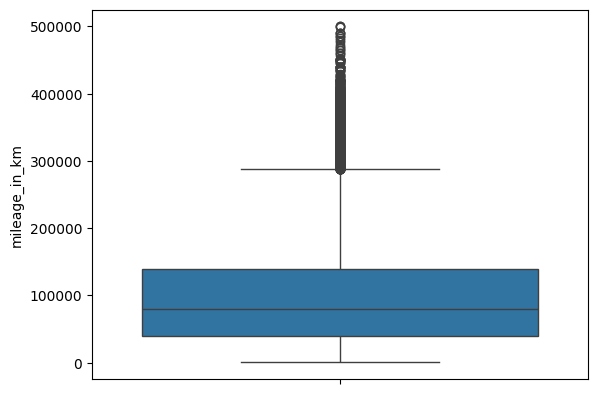

In [ ]:
sns.boxplot(df['mileage_in_km'])

In [ ]:
df['mileage_in_km']=df['mileage_in_km'].fillna(df['mileage_in_km'].median())

Remove Outliers


In [ ]:
df_clean = df[
    (df['mileage_in_km'] >= 500) & (df['mileage_in_km'] <= 500000) &
    (df['power_kw'] >= 20) & (df['power_kw'] <= 500) &
    (df['fuel_consumption_l_100km'] >= 2) & (df['fuel_consumption_l_100km'] <= 25) &
    (df['fuel_consumption_g_km'] >= 50) & (df['fuel_consumption_g_km'] <= 500) &
    (df['price_in_euro'] >= 500) & (df['price_in_euro'] <= 150000)
]

print(f"Original rows: {len(df)}")
print(f"Cleaned rows: {len(df_clean)}")
print(f"Rows removed: {len(df) - len(df_clean)}")

Original rows: 85258
Cleaned rows: 85258
Rows removed: 0


In [ ]:
df=df_clean

In [ ]:
df.head()

,brand,model,color,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
1,hyundai,Hyundai i10,black,2018,11555.0,49.0,67.0,Manual,Petrol,4.6,106.0,27782.0
3,honda,Honda CR-V,red,2018,24490.0,114.0,155.0,Automatic,Petrol,7.5,175.0,57000.0
4,kia,Kia Sportage,black,2023,34990.0,110.0,150.0,Manual,Petrol,5.9,150.0,7500.0
5,honda,Honda Civic,black,2009,5800.0,103.0,140.0,Manual,Petrol,6.7,155.0,160000.0
7,hyundai,Hyundai KONA,red,2019,18690.0,88.0,120.0,Manual,Petrol,5.4,125.0,64300.0


In [ ]:
df.isnull().sum()

,0
brand,0
model,0
color,0
year,0
price_in_euro,0
power_kw,0
power_ps,0
transmission_type,0
fuel_type,0
fuel_consumption_l_100km,0


In [ ]:
df.shape

(85258, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85258 entries, 1 to 99999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   brand                     85258 non-null  object 
 1   model                     85258 non-null  object 
 2   color                     85258 non-null  object 
 3   year                      85258 non-null  int64  
 4   price_in_euro             85258 non-null  float64
 5   power_kw                  85258 non-null  float64
 6   power_ps                  85258 non-null  float64
 7   transmission_type         85258 non-null  object 
 8   fuel_type                 85258 non-null  object 
 9   fuel_consumption_l_100km  85258 non-null  float64
 10  fuel_consumption_g_km     85258 non-null  float64
 11  mileage_in_km             85258 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 8.5+ MB


In [ ]:
df.describe()

,year,price_in_euro,power_kw,power_ps,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
count,85258.000000,85258.000000,85258.000000,85258.000000,85258.000000,85258.000000,85258.000000
mean,2015.636093,23702.605750,136.111239,185.140902,6.205724,151.558763,96581.565179
std,5.065587,19446.676988,72.044627,97.929116,1.810372,46.325642,73523.496097
min,1995.000000,500.000000,31.000000,42.000000,2.000000,50.000000,500.000000
25%,2013.000000,11790.000000,88.000000,120.000000,5.100000,126.000000,39870.250000
50%,2017.000000,18900.000000,116.000000,158.000000,5.800000,139.000000,80000.000000
75%,2019.000000,28999.000000,155.000000,211.000000,6.800000,163.000000,139000.000000
max,2023.000000,150000.000000,500.000000,680.000000,22.900000,500.000000,500000.000000


In [ ]:
df.to_csv('Cleaned_car_data.csv',index=False)